# Importing Libraries

In [9]:
import numpy as np
import pandas as pd
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

# Importing the Dataset

In [4]:
df=pd.read_csv('Fraud_check.csv')
df.head() #retrieving the first 5 records.

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA/ Feature Engineering steps:

In [5]:
df.shape #Checking the shape of the data

(600, 6)

In [6]:
df.isnull().any() #checking for any missing values in the data

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [7]:
df_num=[]
df_cat=[]
for i in df.columns:
    if(df[i].dtype=='int64'):
        df_num.append(i)
    else:
        df_cat.append(i)
print(df_num)
print(df_cat)

['Taxable.Income', 'City.Population', 'Work.Experience']
['Undergrad', 'Marital.Status', 'Urban']


### In the above block of code I am seaparating the categorical features and numerical features using for loop

In [11]:
for i in df_cat:
    print('Unique label in {} is: {}'.format(i,df[i].unique())) #obtaining the unique labels in the categorical feature.

Unique label in Undergrad is: ['NO' 'YES']
Unique label in Marital.Status is: ['Single' 'Divorced' 'Married']
Unique label in Urban is: ['YES' 'NO']


### unique() function gives the unique labels in the categorical feature.

In [12]:
df['Undergrad']=np.where(df['Undergrad']=='Yes',1,0) #Converting the categorical feature values into 1's and 0's using the 
#np.where function.
df['Urban']=np.where(df['Urban']=='Yes',1,0)

### using np.where converting all the labels with yes as 1 in the categorical feature Undergrad and Urban to 1 and rest to 0.

In [13]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,0
1,0,Divorced,33700,134075,18,0
2,0,Married,36925,160205,30,0
3,0,Single,50190,193264,15,0
4,0,Married,81002,27533,28,0


## One hot encoding

In [14]:
df1=pd.get_dummies(df['Marital.Status'],drop_first=True) # One hot encoding on the categorical feature Marital.Status using
# get_dummies and drop the first column to avoid dummy variable trap.
df=pd.concat([df,df1],axis=1) #concatenating the one hot encoded data to the actual dataframe using pd.concat
df.drop('Marital.Status',axis=1,inplace=True) #dropping the Marital.Status since we don't need them
df.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Married,Single
0,0,68833,50047,10,0,0,1
1,0,33700,134075,18,0,0,0
2,0,36925,160205,30,0,1,0
3,0,50190,193264,15,0,0,1
4,0,81002,27533,28,0,1,0


C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


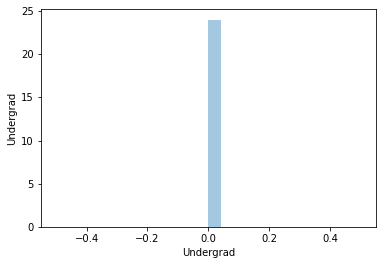

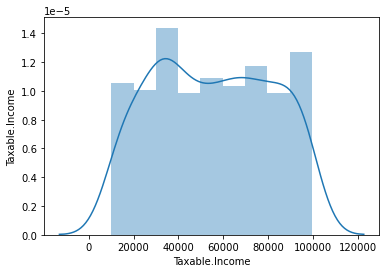

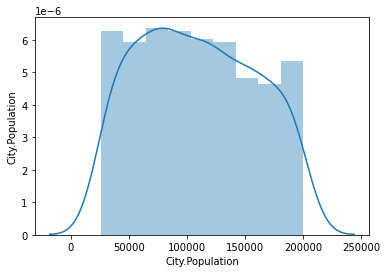

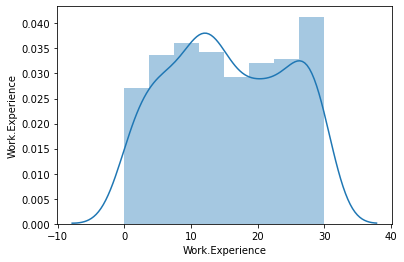

C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


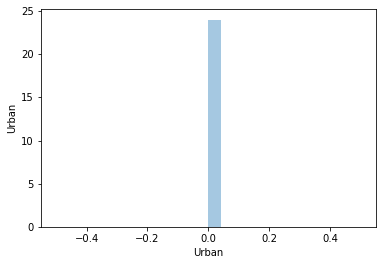

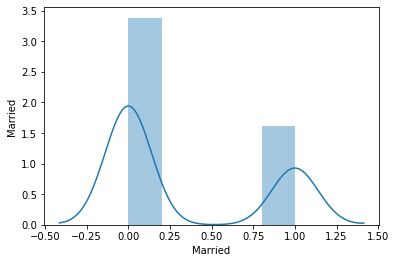

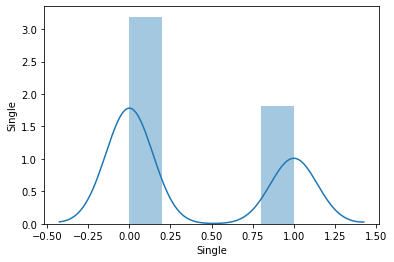

In [18]:
for i in df.columns:
    sns.distplot(df[i]) #plotting a boxplot for each input feature of 3 different class.
    plt.ylabel(i)
    plt.show()

In [21]:
clean_data=df.copy()
clean_data['Taxable.Income']=(clean_data['Taxable.Income']>30000)*1 #if the Taxable income is greater then 30000 populate it
#with 1 else it is 0.
clean_data['Taxable.Income'].head()

0    1
1    1
2    1
3    1
4    1
Name: Taxable.Income, dtype: int32

In [22]:
y=clean_data[['Taxable.Income']].copy() #y is the target variable
y.head()

,Taxable.Income
0,1
1,1
2,1
3,1
4,1


In [23]:
df.columns

Index(['Undergrad', 'Taxable.Income', 'City.Population', 'Work.Experience',
       'Urban', 'Married', 'Single'],
      dtype='object')

In [24]:
X=df[['Undergrad', 'City.Population', 'Work.Experience',
       'Urban', 'Married', 'Single']] #Independent feature.
X.head()

,Undergrad,City.Population,Work.Experience,Urban,Married,Single
0,0,50047,10,0,0,1
1,0,134075,18,0,0,0
2,0,160205,30,0,1,0
3,0,193264,15,0,0,1
4,0,27533,28,0,1,0


# Model Training:

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0) #Splitting the train and the test set.

In [26]:
clf=DecisionTreeClassifier(random_state=0) #obtaining the instance of the Decision tree classifier
clf.fit(X_train,y_train) #Fitting the instance on the train and the test dataset.

DecisionTreeClassifier(random_state=0)

In [27]:
pred=clf.predict(X_test) #predicting the test dataset using clf.predict.
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

accuracy_score(y_test,pred) #obtaining the accuracy of the test and the predicted data

1.0
0.5933333333333334


0.5933333333333334

### We can see that the accuracy of the test set is too low and train data is too high causing overfitting of the train set. This is because the the decision tree is created to its maximum depth causing the model to overfit the data.Thus the training accuracy is too high and the test accuracy is low. To counter this situation we prune the model

[Text(593.1418082209543, 529.2947368421053, 'X[2] <= 24.5\ngini = 0.312\nsamples = 450\nvalue = [87, 363]'),
 Text(389.223450466805, 500.68421052631584, 'X[1] <= 197770.0\ngini = 0.334\nsamples = 349\nvalue = [74, 275]'),
 Text(284.51705134854774, 472.0736842105263, 'X[1] <= 80947.5\ngini = 0.33\nsamples = 346\nvalue = [72, 274]'),
 Text(95.94242738589212, 443.46315789473687, 'X[1] <= 39943.0\ngini = 0.272\nsamples = 117\nvalue = [19, 98]'),
 Text(59.04149377593361, 414.85263157894735, 'X[1] <= 39087.0\ngini = 0.383\nsamples = 31\nvalue = [8, 23]'),
 Text(52.095435684647306, 386.2421052631579, 'X[2] <= 17.5\ngini = 0.328\nsamples = 29\nvalue = [6, 23]'),
 Text(34.73029045643153, 357.63157894736844, 'X[1] <= 36940.0\ngini = 0.245\nsamples = 21\nvalue = [3, 18]'),
 Text(27.78423236514523, 329.021052631579, 'X[1] <= 26849.0\ngini = 0.18\nsamples = 20\nvalue = [2, 18]'),
 Text(13.892116182572614, 300.4105263157895, 'X[1] <= 26296.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(6.946058

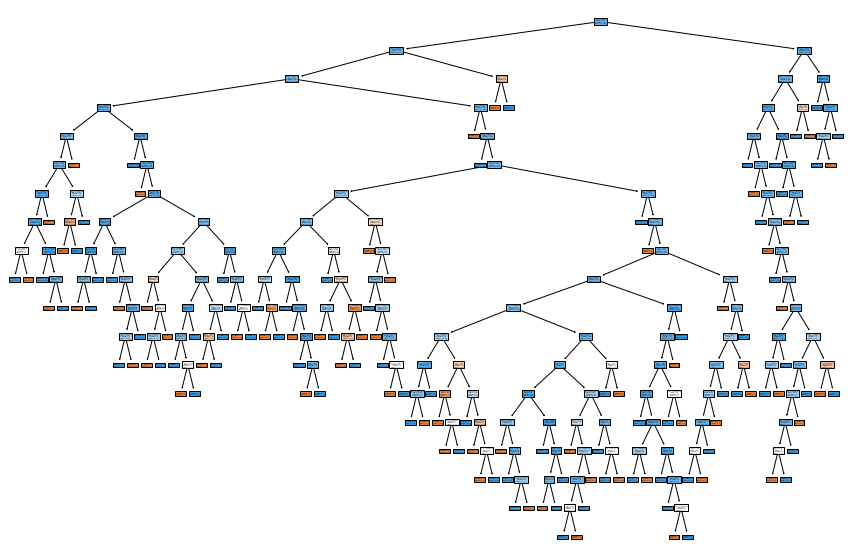

In [28]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True) #visualising the tree using plot_tree function from the module tree.

### As we can see from the above analysis that there are a lot of nodes in the tree and we must perform pruning to avoid overfitting.

In [29]:
path = clf.cost_complexity_pruning_path(X_train, y_train) #cost_complexity_pruning_path will give ccp_alphas and impurities
#in which ccp_alphas is a hyperparameter.
ccp_alphas, impurities = path.ccp_alphas, path.impurities 

In [30]:
ccp_alphas #hypertuning parameter

array([0.        , 0.0012963 , 0.00135802, 0.00136752, 0.00141414,
       0.00141707, 0.00143659, 0.00148148, 0.00166667, 0.00166667,
       0.00166667, 0.00169312, 0.00175824, 0.00177778, 0.00177778,
       0.00185185, 0.00185185, 0.00194805, 0.002     , 0.00202254,
       0.00206654, 0.00207407, 0.00207407, 0.00207407, 0.00222222,
       0.00231622, 0.00291326, 0.00296296, 0.00307723, 0.00328736,
       0.00333333, 0.00347308, 0.00383431, 0.00391519, 0.004     ,
       0.00421447])

In [31]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.00421446836351011


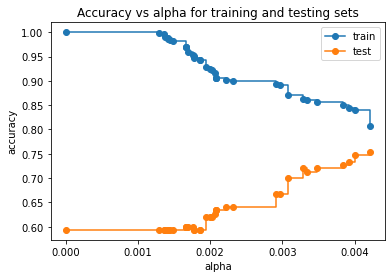

In [32]:
train_scores = [clf.score(X_train, y_train) for clf in clfs] #list comprehension of train score
test_scores = [clf.score(X_test, y_test) for clf in clfs] #list comprehension of test score

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### Plotting the train and test score w.r.t alpha, we choose that value of alpha where the train and test score doesn't vary much, a generalised model with low variance and low bias. From the above plot we see that we obtain a generalised model with alpha =0.04

In [33]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.004) #training the model with ccp_alpha=0.004
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.004, random_state=0)

In [38]:
X_train

,Undergrad,City.Population,Work.Experience,Urban,Married,Single
46,0,137346,27,0,1,0
263,0,69386,21,0,1,0
458,0,110892,18,0,0,1
230,0,81593,14,0,1,0
107,0,52424,6,0,1,0
...,...,...,...,...,...,...
277,0,117364,11,0,0,0
9,0,155482,4,0,0,0
359,0,157299,11,0,0,1
192,0,126556,10,0,1,0


In [39]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(clf.score(X_train,y_train)) #accuracy of the train data
print(accuracy_score(y_test, pred)) ##accuracy of the test data

0.84
0.7466666666666667


### Now we have obtained the generalised model

# Visualising the new decision tree

[Text(279.0, 520.95, 'X[2] <= 24.5\ngini = 0.312\nsamples = 450\nvalue = [87, 363]'),
 Text(209.25, 475.65000000000003, 'X[1] <= 197770.0\ngini = 0.334\nsamples = 349\nvalue = [74, 275]'),
 Text(139.5, 430.35, 'X[1] <= 80947.5\ngini = 0.33\nsamples = 346\nvalue = [72, 274]'),
 Text(69.75, 385.05, 'gini = 0.272\nsamples = 117\nvalue = [19, 98]'),
 Text(209.25, 385.05, 'X[1] <= 82708.5\ngini = 0.356\nsamples = 229\nvalue = [53, 176]'),
 Text(139.5, 339.75, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(279.0, 339.75, 'X[1] <= 86144.0\ngini = 0.345\nsamples = 226\nvalue = [50, 176]'),
 Text(209.25, 294.45, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(348.75, 294.45, 'X[1] <= 116332.0\ngini = 0.356\nsamples = 216\nvalue = [50, 166]'),
 Text(279.0, 249.14999999999998, 'X[1] <= 109749.5\ngini = 0.427\nsamples = 68\nvalue = [21, 47]'),
 Text(139.5, 203.84999999999997, 'X[4] <= 0.5\ngini = 0.35\nsamples = 53\nvalue = [12, 41]'),
 Text(69.75, 158.55, 'gini = 0.229\nsamples = 38\nvalue

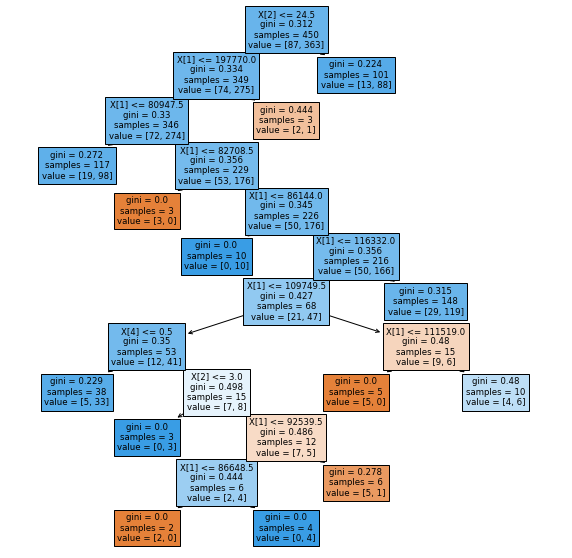

In [46]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True)